# Practice 1
Data: Boston 집 값

In [2]:
import sklearn.datasets as d
import sklearn.preprocessing as pp
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.metrics as mt

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
boston = d.load_boston()
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

In [5]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X = pd.DataFrame(X["RM"])
X.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


In [7]:
X_train, X_test, y_train, y_test = \
ms.train_test_split(X, y, test_size=0.3, random_state = 1)

In [8]:
lr = lm.LinearRegression()    #학습을 준비. 회귀 모형을 저장할 준비가 되어 있는 객체.

In [9]:
# x 좌표를 먼저 만들고
# xx = np.arange(3, 9, 0.01)[:, np.newaxis]
xx  = np.linspace(3, 9)[:, np.newaxis]

In [10]:
# Simple Linear Regression
# 학습, 예측(+테스트,검증?), 좌표계에 대응하는 y값 만들기 함께 해야 함.
# 한번 회귀 모형을 만들고 나면 변수(lr. estimate라고 말하는 회귀 모형을 만들 준비를 하는 lr. 일회용이기떄무넹) 안에는 기존 것이 들어있기 때문에.
reg1 = lr.fit(X_train, y_train)    # 독립 변수가 한 개이므로 단순 선형 회귀
y_pred1 = reg1.predict(X_test)

yy1 = reg1.predict(xx)

In [11]:
# 2차식의 다항 회귀
quad = pp.PolynomialFeatures(degree = 2)
X2_train = quad.fit_transform(X_train)    # 학습 데이터를 불림
reg2 = lr.fit(X2_train, y_train)       # 학습

X2_test = quad.fit_transform(X_test)    # 테스트 데이터를 불림
y_pred2 = reg2.predict(X2_test)

xx2 = quad.fit_transform(xx)
yy2 = reg2.predict(xx2)    # xx2는 회귀식에 넣기 위해서 잠깐 부풀린 것 뿐

In [12]:
# 3차식의 다항 회귀
cubic = pp.PolynomialFeatures(degree = 3)
X3_train = cubic.fit_transform(X_train)    # 학습 데이터를 불림
reg3 = lr.fit(X3_train, y_train)       # 학습

X3_test = cubic.fit_transform(X_test)    # 테스트 데이터를 불림
y_pred3 = reg3.predict(X3_test)

xx3 = cubic.fit_transform(xx)
yy3 = reg3.predict(xx3)

In [13]:
# 그림 그리려면 좌표가 필요하다.
# -> 위에서 xx, yy1, yy2, yy3 정의함

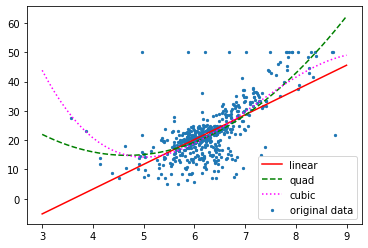

In [14]:
plt.plot(xx, yy1, color="red", linestyle="-", label="linear")
plt.plot(xx, yy2, color="green", linestyle="--", label="quad")
plt.plot(xx, yy3, color="magenta", linestyle=":", label="cubic")
plt.scatter(X, y, label="original data", s=5)
plt.legend()

-> 그림으로 보면 3차 함수가 가장 잘 fitted인 것 같다.

In [15]:
mt.r2_score(y_test, y_pred1)
# reg1.score(...) 와 같다

0.6015774471545621

In [16]:
reg1.score(y_test, y_pred1)

ValueError: Expected 2D array, got 1D array instead:
array=[28.2 23.9 16.6 22.  20.8 23.  27.9 14.5 21.5 22.6 23.7 31.2 19.3 19.4
 19.4 27.9 13.9 50.  24.1 14.6 16.2 15.6 23.8 25.  23.5  8.3 13.5 17.5
 43.1 11.5 24.1 18.5 50.  12.6 19.8 24.5 14.9 36.2 11.9 19.1 22.6 20.7
 30.1 13.3 14.6  8.4 50.  12.7 25.  18.6 29.8 22.2 28.7 23.8  8.1 22.2
  6.3 22.1 17.5 48.3 16.7 26.6  8.5 14.5 23.7 37.2 41.7 16.5 21.7 22.7
 23.  10.5 21.9 21.  20.4 21.8 50.  22.  23.3 37.3 18.  19.2 34.9 13.4
 22.9 22.5 13.  24.6 18.3 18.1 23.9 50.  13.6 22.9 10.9 18.9 22.4 22.9
 44.8 21.7 10.2 15.4 25.3 23.3  7.2 21.2 11.7 27.  29.6 26.5 43.5 23.6
 11.  33.4 36.  36.4 19.  20.2 34.9 50.  19.3 14.9 26.6 19.9 24.8 21.2
 23.9 20.6 23.1 28.  20.  23.1 25.   9.7 23.9 36.1 13.4 12.7 39.8 10.4
 20.6 17.8 19.5 23.7 28.5 24.3 23.8 19.1 28.4 20.5 33.8 14.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [17]:
mt.r2_score(y_test, y_pred2)

0.6670629868010137

In [18]:
mt.r2_score(y_test, y_pred3)

0.6667764542233331

-> 2차, 3차 함수가 맞겠구나.